In [38]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import find_peaks

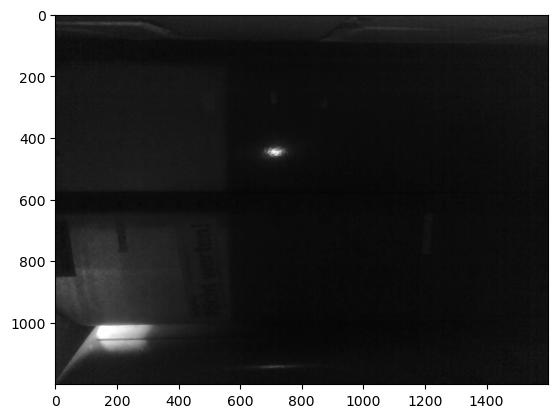

In [39]:
img = cv2.cvtColor(cv2.imread('/home/sheid/Nextcloud/Ã–ltank/20241017040021.jpg'), cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [44]:
levels = np.mean(img,axis=1)
s = 32
kernel = np.array([-1]*s+ [0]*(s+1))
edge_filtered = np.convolve(levels, kernel, mode='valid')
plt.plot(edge_filtered)
y= find_peaks(edge_filtered, height=-800)[0][0] +s
y

np.int64(111)

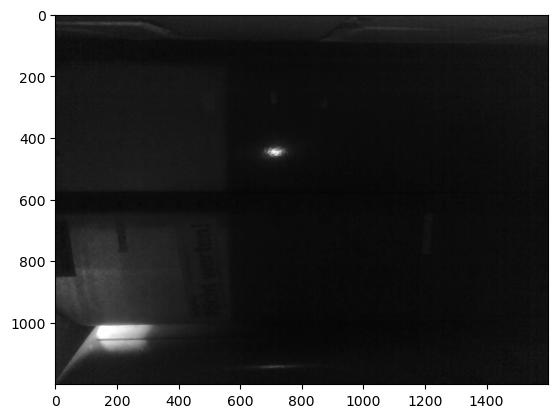

In [45]:
region = img
plt.imshow(region, cmap='gray')

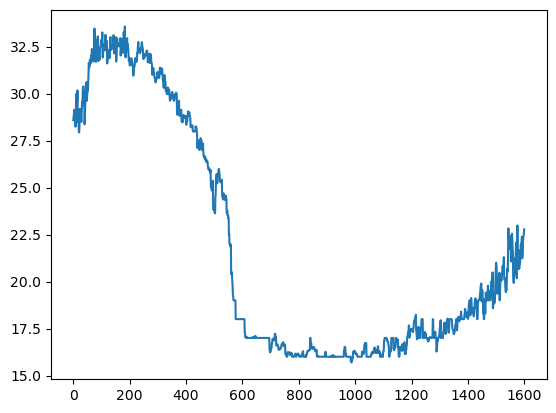

In [46]:
k25 = int(region.shape[0] * 0.45)
k75 = region.shape[0] - k25
data = np.partition(region, (k25, k75), axis=0)[k25:k75+1, :]

# Compute the mean across axis 0
levels = np.mean(data, axis=0)
plt.plot(levels)

In [47]:
s = 64
kernel = np.array([-1]*s+ [0]+ [1]*s)
edge_filtered = np.convolve(levels, kernel, mode='valid')
plt.plot(edge_filtered)
x = np.argmax(edge_filtered) +s
x

np.int64(560)

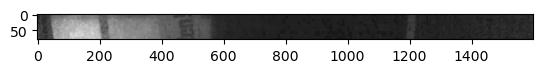

In [50]:
region = img[y+570:y+650]
plt.imshow(region, cmap='gray')

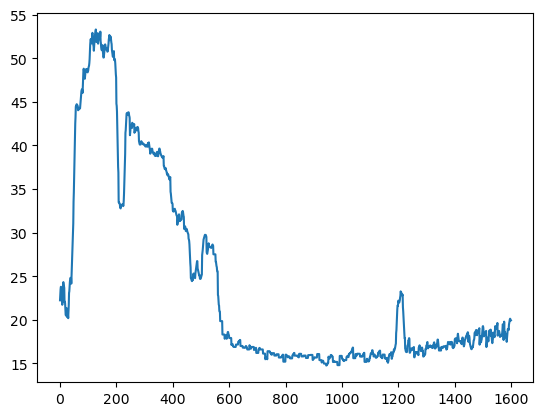

In [51]:
levels = np.mean(region,axis=0)
plt.plot(levels)

(np.int64(230), np.int64(1194))

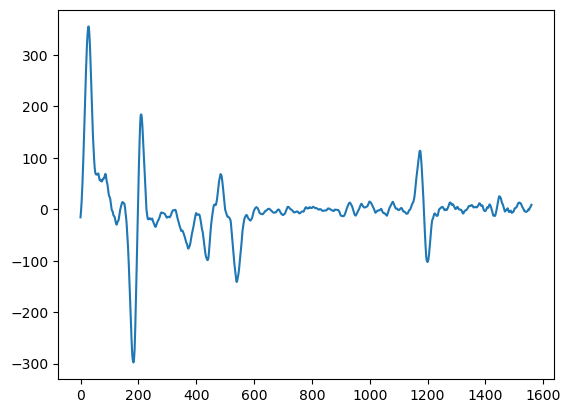

In [52]:
s = 20
kernel = np.array([1]*s+ [0]+ [-1]*s)
edge_filtered = np.convolve(levels, kernel, mode='valid')
plt.plot(edge_filtered)
up,low = find_peaks(np.hstack((np.zeros(100),edge_filtered[100:])), height=110)[0]
up+s,low +s

In [53]:
l = (up-low) /800
((x-low)/l + 400)*3


np.float64(2728.630705394191)